### Graded Lab 3

Hello ! Welcome to Graded Lab of Module 3.

Working on the same analysis task.

* Here we will work on correlations between variables , testing few of the hypothesis business wants us to test.

In case if you are not able to recollect the problem description and data description then mentioning it below.

Lets look at the problem statement,

*Client: ABC Retail, Incorporated, rest-of-the-world division* 

***Project name: Online retail sales analysis*** 

An online retailer, ABC, Inc., operates in nearly 100 countries worldwide, selling furniture, office supplies and technology products to customers in three segments: consumer, corporate and home office. ABC, Inc. is a US-based company, and it has two major divisions: US and rest of the world. We are working with the rest of the world division of the company. 

They have provided us with online sales transaction data from 2011 to 2014.

We are given 3 datasets:-

1. Data on each sale; 51290 records; all data in US dollars
It contains fields like
**order_id** (identifier) ,order_date ,ship_date ,ship_mode ,**customer_id**(identifier) ,product_id ,category ,sub_category ,product_name ,sales ,quantity ,discount ,profit ,shipping_cost ,order_priority ,**vendor_code** (identifier) 


2. Data on the customers; 1590 records 
It contains fields like
**customer_id** (identifier) ,customer_name ,city ,state ,country ,postal_code ,segment ,market ,region 

3. Data on vendors who supply the retailer; 65 records 
It contains fields like
vendor ,**vendor_code** (identifier) 

We need to analyze the data and need to provide answers to different questions asked by company officials.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from itertools import combinations
from scipy import stats
from statsmodels.stats import weightstats as ztests


### Reading sales data
sales = pd.read_csv('sales_data.csv')

### Reading customer data
cust = pd.read_csv(r'customers.csv',encoding='iso-8859-1')

### Reading vendor data
vend = pd.read_csv(r'vendors.csv')

sales.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,vendor_code
0,1,MX-2014-143658,02/10/2014,06/10/2014,Standard Class,SC-20575,OFF-LA-10002782,Office Supplies,Labels,"Hon File Folder Labels, Adjustable",13.08,3,0.0,4.56,1.03,Medium,VE_001
1,2,MX-2012-155047,15/10/2012,20/10/2012,Standard Class,KW-16570,FUR-FU-10004015,Furniture,Furnishings,"Tenex Clock, Durable",252.16,8,0.0,90.72,13.45,Medium,VE_002
2,3,MX-2012-155047,15/10/2012,20/10/2012,Standard Class,KW-16570,FUR-BO-10002352,Furniture,Bookcases,"Ikea 3-Shelf Cabinet, Mobile",193.28,2,0.0,54.08,9.63,Medium,VE_003
3,4,MX-2012-155047,15/10/2012,20/10/2012,Standard Class,KW-16570,OFF-BI-10004428,Office Supplies,Binders,"Cardinal Binder, Clear",35.44,4,0.0,4.96,1.37,Medium,VE_004
4,5,MX-2012-155047,15/10/2012,20/10/2012,Standard Class,KW-16570,OFF-AR-10004594,Office Supplies,Art,"Sanford Canvas, Water Color",71.60,2,0.0,11.44,3.79,Medium,VE_005


In order to solve the next questions , we need to combine all the 3 datasets into a single dataframe such that every details of sales dataframe are intact. So here we have written a data processing function.
There are 2 tasks which are to be performed.
1. Merge/ Join all the 3 datasets into a single dataframe such that every details of sales dataframe are intact. (Understand which should be the joining key , type of join , refer .merge() function of pandas)
2. Convert 'order_date' into a datetime column.
**Return output as a dataframe**

In [2]:
#### data_merging & order_date processing , data1 will be sales , data2 will be customer dataset & data3 will be vendor dataset.

def data_process(data1,data2,data3):
    # your code here
    data = pd.merge(data1,data2,on='customer_id',how='left')
    data = pd.merge(data,data3,on='vendor_code',how='left')
    data['order_date'] = pd.to_datetime(data['order_date'])
    return data

In [3]:
sales= data_process(data1=sales.copy(),data2=cust.copy(),data3=vend.copy())

In [4]:
assert sales['order_date'].dtypes=='<M8[ns]' ,'Make sure that you have converted order_date into a datetime format correctly.'
assert sales.shape== (51290,26) ,'Checking size and shape of dataframe after merging is a very important check.'

### Q1. What is skewness,skewness type ,kurtosis, kurtosis type for profit column ? 
#### Return output in tuple format.Eg :- (-1, "Left-skewed", 2, "Platykurtic"). Make sure to round off answer to 2 decimals.


Note:-
1. Skewness type takes 3 values :- Right-skewed (Skewness >0) ,Left-skewed (Skewness <0), Symmetric (Skewness = 0)
2. Kurtosis type takes 3 values :- Platykurtic (kurtosis < 3) ,Leptokurtic (kurtosis > 3), Mesokurtic (kurtosis = 3)

In [5]:
def skew_kurt(data,column):    
    # your code here
    import pandas as pd
    import scipy.stats as stats
    skewness = data[column].skew()
    kurtosis = data[column].kurtosis()
    if skewness > 0:
        skewtype = 'Right-skewed'
    elif skewness < 0:
        skewtype = 'Left-skewed'
    else:
        skewtype = 'Symmetric'
        
    if kurtosis > 3:
        kurttype = 'Leptokurtic'
    elif kurtosis < 3:
        kurttype = 'Platykurtic'
    else:
        kurttype = 'Mesokurtic'
    return round(skewness,2),skewtype,round(kurtosis,2),kurttype

In [6]:
assert type(skew_kurt(data=sales,column='profit'))==tuple, "Please provide output in a tuple format."
assert len(skew_kurt(data=sales,column='profit'))==4,"Please include skewness , skewness_type , kurtosis & kurtosis_type."
assert skew_kurt(data=sales,column='profit')[1] in ["Right-skewed","Left-skewed","Symmetric"],"Please include from the listed types only , also make sure that spelling is correct."
assert skew_kurt(data=sales,column='profit')[3] in ["Platykurtic","Leptokurtic","Mesokurtic"],"Please include from the listed types only , also make sure that spelling is correct."

In [7]:
# autograder cells , please do not alter/ delete /edit this cell,Kindly ignore this cell.

### Q2.	What is correlation between different numerical variables ? ('sales', 'quantity', 'discount', 'profit', 'shipping_cost')
### Return a dataframe with 3 columns : Variable 1 , Variable 2 , Correlation. 
### Round off correlation values upto 4 decimals.
### Sort dataframe with respect to highest absolute correlation & make sure that one variable pair occurs only once. For eg : (Col A , Col B) has occured then (Col B , Col A) cant occur.

In [8]:
def corr_sales(data):
    import itertools
    cols = ['sales', 'quantity', 'discount', 'profit', 'shipping_cost']
    cc = data[cols].corr()
    combinations = itertools.combinations(cols, 2)

    pair_df = pd.DataFrame(columns=['variable_1' , 'variable_2' , 'corr','abs_corr'])
    for index,combination in enumerate(combinations):
        pair_df.loc[index,'variable_1'] = combination[0]
        pair_df.loc[index,'variable_2'] = combination[1]
        pair_df.loc[index,'corr'] = round(cc.loc[combination],4)
        pair_df.loc[index,'abs_corr'] = abs(round(cc.loc[combination],4))
        pair_df.sort_values(by='abs_corr', ascending=False,inplace=True)
    return pair_df[['variable_1','variable_2','corr']]

In [9]:
assert type(corr_sales(data=sales))==pd.DataFrame, "Please provide output in dataframe format."
assert all(corr_sales(data=sales).columns==['variable_1', 'variable_2', 'corr']), "Make sure your output columns are named as 'variable_1', 'variable_2', 'corr'."
assert corr_sales(data=sales).shape[1]==3, "Make sure you are returning only 3 columns."
assert corr_sales(data=sales).shape[0]==10, "Make sure you are returning all possible combinations."
assert list(corr_sales(data=sales)['corr'])[0]== 0.7681, "Please provide correct value , make sure that answer is rounded upto 4 digits."
assert list(corr_sales(data=sales)['corr'])[-1]== -0.0199, "Please provide correct value , make sure that answer is rounded upto 4 digits."

In [10]:
# autograder cells , please do not alter/ delete /edit this cell,Kindly ignore this cell.

### Q3.	 Plot a box plot for sales in 'Furniture' category and tell on which side of box-plot you were able to see outliers.

### Store the output in 'outliers_whiskers' variable. Output should be from one of the following choices : 'both_sides' , 'upper_whisker' ,'lower_whisker'. 

{'whiskers': [<matplotlib.lines.Line2D at 0x746d551e8b90>,
 'caps': [<matplotlib.lines.Line2D at 0x746d551f3650>,
 'boxes': [<matplotlib.lines.Line2D at 0x746d551e8610>],
 'medians': [<matplotlib.lines.Line2D at 0x746d551fb150>],
 'fliers': [<matplotlib.lines.Line2D at 0x746d551fb690>],
 'means': []}

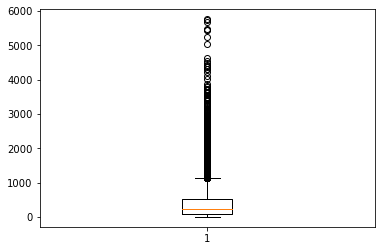

In [11]:
df = sales[['category','sales']]
df = sales[sales['category'] == 'Furniture'][['sales']]
import matplotlib.pyplot as plt
plt.boxplot(df.sales)
# sales.head()

In [12]:
def outlier_sales(data): 
    import matplotlib.pyplot as plt
    df = data[data['category'] == 'Furniture'][['sales']]
    plt.boxplot(df.sales)
    IQR=(df['sales'].quantile(0.75))-(df['sales'].quantile(0.25))
    lower_whisker = (df['sales'].quantile(0.25))-1.5*IQR
    upper_whisker = (df['sales'].quantile(0.75))+1.5*IQR

    def outlier_dir(x):
        if x < lower_whisker:
            outlier = 'lower_whisker'
        elif x > upper_whisker:
            outlier = 'upper_whisker'
        else:
            outlier = 'not_outlier'
        return outlier

    df['outlier_dir'] = df.sales
    df['outlier_dir'] = df['outlier_dir'].apply(outlier_dir)
    outliers_dir = df['outlier_dir'].unique().tolist()
    outliers_dir.remove('not_outlier')
    if len(outliers_dir) == 2:
        outliers_whiskers = 'both_sides'
    elif outliers_dir[0] == 'lower_whisker':
        outliers_whiskers = 'lower_whisker'
    elif outliers_dir[0] == 'upper_whisker':
        outliers_whiskers = 'upper_whisker'
    else:
        outliers_whiskers = ''
    return outliers_whiskers # outlier_whsikers is a variable in where you will store answer selected from this 3 options : both_sides , upper_whisker , lower_whisker

'upper_whisker'

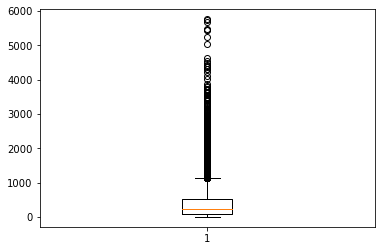

In [13]:
outlier_sales(sales)

In [14]:
# autograder cells , please do not alter/ delete /edit this cell,Kindly ignore this cell.

### Q4.	What is probability that profit lies between 13 & 25.
Return output as float type (check if output dtype is numpy.float64) ,rounded upto 4 decimals.

In [38]:
sales.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,product_id,category,sub_category,product_name,...,vendor_code,customer_name,city,state,country,postal_code,segment,market,region,vendor
0,1,MX-2014-143658,2014-02-10,06/10/2014,Standard Class,SC-20575,OFF-LA-10002782,Office Supplies,Labels,"Hon File Folder Labels, Adjustable",...,VE_001,Sonia Cooley,Mexico City,Distrito Federal,Mexico,NaN,Consumer,LATAM,LATAM-North,Accenco
1,2,MX-2012-155047,2012-10-15,20/10/2012,Standard Class,KW-16570,FUR-FU-10004015,Furniture,Furnishings,"Tenex Clock, Durable",...,VE_002,Kelly Williams,Dos Quebradas,Risaralda,Colombia,NaN,Consumer,LATAM,LATAM-South,Ace Corporation
2,3,MX-2012-155047,2012-10-15,20/10/2012,Standard Class,KW-16570,FUR-BO-10002352,Furniture,Bookcases,"Ikea 3-Shelf Cabinet, Mobile",...,VE_003,Kelly Williams,Dos Quebradas,Risaralda,Colombia,NaN,Consumer,LATAM,LATAM-South,Nero
3,4,MX-2012-155047,2012-10-15,20/10/2012,Standard Class,KW-16570,OFF-BI-10004428,Office Supplies,Binders,"Cardinal Binder, Clear",...,VE_004,Kelly Williams,Dos Quebradas,Risaralda,Colombia,NaN,Consumer,LATAM,LATAM-South,Rushcorp
4,5,MX-2012-155047,2012-10-15,20/10/2012,Standard Class,KW-16570,OFF-AR-10004594,Office Supplies,Art,"Sanford Canvas, Water Color",...,VE_005,Kelly Williams,Dos Quebradas,Risaralda,Colombia,NaN,Consumer,LATAM,LATAM-South,Low Tide Corp


In [15]:
sales['Profit/Loss'] = sales['profit'].apply(lambda x: True if x >0 else False)

In [16]:
sales['Profit/Loss'].value_counts(normalize=True)

True     0.742406
False    0.257594
Name: Profit/Loss, dtype: float64

In [10]:
from scipy.stats import binom
# binom.pmf(x,n,p)
# binom.cdf(x,n,p)

In [35]:
p = 0.74
n = len(sales)
lower_bound = 13
upper_bound = 25
(1-binom.cdf(upper_bound,n,p)) - ( 1 - binom.cdf(lower_bound,n,p)  )

0.0

In [37]:
binom.cdf(13,n,p)

0.0

In [35]:
# binom.pmf(lower_bound,n,p)
sum((data<=25) & (data > 0))

21832

In [ ]:
def prob(data,lower_bound,upper_bound):
    # your code here

In [ ]:
assert type(prob(data=sales,lower_bound=13,upper_bound=25))==np.float64, 'Make sure that you are returning output as float64 (check if output dtype is numpy.float64) type , it should be rounded up to 4 decimals.'
assert (prob(data=sales,lower_bound=13,upper_bound=25)>=0) & (prob(data=sales,lower_bound=13,upper_bound=25)<=1), 'Remember probability always lies between 0 to 1.'

In [ ]:
# autograder cells , please do not alter/ delete /edit this cell,Kindly ignore this cell.


###  Q.5) Company's Sales team found an interesting insight from past study. Study said that on a 3-yr scale  avg quantities sold comes out to be 3. Now they want to test if the average quantities sold number has increased or not i.e they wish to understand if average quantities sold are greater than a previously known value i.e 3 or not , Our data is on  3 yrs horizon. So they have asked you to draw a sample of size 100 from sales data, analyze and report findings. Select alpha (level of significance) as 0.05.

**Return output as tuple consisting of  (statistics_value, p-value, decision). Make sure to round up statistics_value & p-value to 4 decimals. Your code will be tested on an input sample (sample_1).**


For eg :- (1.267,0.045,'Reject Null hypothesis')

Where ,stastics:- It is calculated statistic from appropriate test.

p-value :- probability value

Decision :- You have to select from the 2 choices 'Reject Null Hypothesis' , 'Do not Reject Null Hypothesis''

**Hint:**

We are trying to test a hypothesis whether average quantities data for sales data are greater than previously known value 3 or not ?
In order to solve this problem , Think on the lines below.

H0: Average quantities sold = previously_known_population_value (3)

H1: Average quantities sold > previously_known_population_value (3) 

We will use 1 sample z-test with alernative type as 'larger'  for solving this problem.

In [36]:
# Please do not alter/ delete /edit this cell.

from scipy import stats
from statsmodels.stats.weightstats import ztest as ztest
import random
random.seed(9001)

sampleSize=100
group_A= sales['quantity']
sample_1 =  random.sample([x for x in group_A], sampleSize)

## sample for sold quantities is given as sample_1
print(f"length of sold 'quantity' sample is {len(sample_1)}")

length of sold 'quantity' sample is 100


In [37]:
assert np.mean(sample_1)==3.42 , "If the sales dataframe is not being created properly then sample mean will not match ,check the creation of sales datafarme again."

In [38]:
def one_sample_ztest(sample1,alpha,popn_value):
    ## sample1(quantity) will be a list of values with length 100.
    # your code here
    z_statistic, p_value = ztest(sample_1,value = popn_value,alternative='larger')
    
    if p_value <= alpha:
        decision = 'Reject Null Hypothesis'
    else:
        decision = 'Do not Reject Null Hypothesis'

    return round(z_statistic,4),round(p_value,4),decision  

In [39]:
one_sample_ztest(sample_1,alpha=0.05,popn_value=3)

(1.8498, 0.0322, 'Reject Null Hypothesis')

In [25]:
# autograder cells , please do not alter/ delete /edit this cell,Kindly ignore this cell.

### Q.6)  Sales team is interested in knowing if furniture & office supply products sell equally or is there any differece between their sells so they ask us to draw a sample of size 22 from furniture & sample of size 25 from Office Supplies from sales dataset and report findings. Select alpha (level of significance) as 0.05.

**Return output as tuple consisting of (statistics_value, p-value, decision). Make sure that stastics,p-value are rounded upto 4 digits.Your code will be tested on 2 input samples (sample_1,sample_2).**

For eg :- (1.267,0.045,'Reject Null hypothesis')

Where ,stastics:- It is calculated statistic from chosen test.

p-value :- probability value

Decision :- 'Reject Null Hypothesis' , ''Do not Reject Null Hypothesis''



In [26]:
# Please do not alter/ delete /edit this cell.

import random
random.seed(9001)


sampleSize=22
group_A= sales[sales['category']=='Furniture']['sales']
sample_1 =  random.sample([x for x in group_A], sampleSize)



sampleSize=25
group_B= sales[sales['category']=='Office Supplies']['sales']
sample_2 =  random.sample([x for x in group_B], sampleSize)


## sample for Furniture sales is given as sample_1
print(f'length of Furniture sales sample is {len(sample_1)}')
## sample for Office Supply sales is given as sample_2
print(f'length of Office Supply sales sample is {len(sample_2)}')

length of Furniture sales sample is 22
length of Office Supply sales sample is 25


In [27]:
assert round(np.mean(sample_1),2)==367.13 , "If the sales dataframe is not being created properly then sample mean will not match ,check the creation of sales datafarme again."
assert round(np.mean(sample_2),2)==92.96 , "If the sales dataframe is not being created properly then sample mean will not match ,check the creation of sales datafarme again."

In [30]:
def hypo_test(sample1,sample2,alpha):
    ## sample1(furniture sales) will be a list of values with length 22.
    ## sample2(office supplies sales) will be a list of values with length 25.
    # your code here
    from scipy.stats import ttest_ind
    alpha=0.05

    statistic,p_value = ttest_ind(sample1,sample2)

    if p_value < alpha:
        decision = 'Reject Null Hypothesis'
    else:
        decision = 'Do not Reject Null Hypothesis'    
    
    return round(statistic,4),round(p_value,4),decision

In [31]:
hypo_test(sample_1,sample_2,alpha=0.05)

(3.4987, 0.0011, 'Reject Null Hypothesis')

In [ ]:
# autograder cells , please do not alter/ delete /edit this cell,Kindly ignore this cell.
### Hidden test 1

In [ ]:
# autograder cells , please do not alter/ delete /edit this cell,Kindly ignore this cell.
### Hidden test 2

In [ ]:
# autograder cells , please do not alter/ delete /edit this cell,Kindly ignore this cell.
### Hidden test 2

## Great Job ! ! !
Business team is happy with your work they wish to test couple of more things & require your help.

### Q.7)  Sales team is interested in knowing if profits in EMEA & Africa region are same or not. Test the hypothesis. Select alpha (level of significance) as 0.05.

**Return output as tuple consisting of (statistics_value,p-value,decision). Make sure that stastics,p-value are rounded upto 4 digits.Your code will be tested on 2 input samples (sample_1,sample_2).**


For eg :- (1.267,0.045,'Reject Null hypothesis')

Where ,statistics_value:- It is calculated statistic from chosen test.

p-value :- probability value

Decision :- 'Reject Null Hypothesis' , ''Do not Reject Null Hypothesis''



In [32]:
# Please do not alter/ delete /edit this cell
import random
random.seed(9001)

sampleSize=500
group_A= sales[sales['region']=='EMEA']['profit']
sample_1 =  random.sample([x for x in group_A], sampleSize)

sampleSize=567
group_B= sales[sales['region']=='Africa']['profit']
sample_2 =  random.sample([x for x in group_B], sampleSize)

## sample for EMEA is given as sample_1
print(f'length of EMEA sample is {len(sample_1)}')
## sample for Africa is given as sample_2
print(f'length of Africa sample is {len(sample_2)}')

length of EMEA sample is 500
length of Africa sample is 567


In [33]:
assert round(np.mean(sample_1),2)==13.45 , "If the sales dataframe is not being created properly then sample mean will not match ,check the creation of sales datafarme again."
assert round(np.mean(sample_2),2)==27.44 , "If the sales dataframe is not being created properly then sample mean will not match ,check the creation of sales datafarme again."

In [40]:
def hypo_test(sample1,sample2,alpha):
    ## sample_1 (EMEA region) will be a list of values with length 500.
    ## sample_2 (Africa region) will be a list of values with length 567.
    # your code here
    from scipy import stats
    from statsmodels.stats.weightstats import ztest as ztest
    
    statistic, p_value = ztest(sample1,sample2)
    
    if p_value <= alpha:
        decision = 'Reject Null Hypothesis'
    else:
        decision = 'Do not Reject Null Hypothesis'
        
    return round(statistic,4),round(p_value,4),decision

In [ ]:
# autograder cells , please do not alter/ delete /edit this cell,Kindly ignore this cell.
### Hidden test 1

In [ ]:
# autograder cells , please do not alter/ delete /edit this cell,Kindly ignore this cell.
### Hidden test 2

In [ ]:
# autograder cells , please do not alter/ delete /edit this cell,Kindly ignore this cell.
### Hidden test 3